In [7]:
import pandas as pd

mdl = pd.read_csv('dataset/DSProjectData.csv', skipinitialspace=True, low_memory=False)

mdl['Date'] = pd.to_datetime(mdl['Date'])
mdl.set_index('Date', inplace=True)

#data.set_index('Date', inplace=True)
#data['Year'] = data.index.year
#data['Month'] = data.index.month
#eda_time['Year']=eda_time.i
mdl['Month']= mdl.index.month
mdl['Day']=mdl.index.day

#eda_time01(['CPU %'].dropna()).astype(float)


In [8]:
mdl01=mdl[mdl['Server Name']=='CALBIPRD01']
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(mdl01['CPU %'].dropna(),color='red')

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  after removing the cwd from sys.path.


In [9]:
autoc = []

for i in range(11):
    autoc.append(mdl01['CPU %'].resample('M').mean().autocorr(lag=1*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='red', linewidth=7.0)

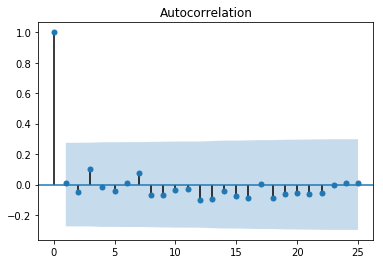

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(mdl01['CPU %'].dropna(), lags=25)